In [1]:
import random
from time import perf_counter

from algorithms_sc.sorts import gnome_sort, shaker_sort
from algorithms_sc.sorts.utils import generate_stand
from tqdm.auto import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Задание

Сравнить алгоритмы шейкерной и гномьей сортировки по времени в двух варинтах:
- в зависимости от длины массива
- в зависимости от степени отсортированности массива (при фиксированной длине $\approx 10^4$)

## 1. Зависимость от длины массива

In [2]:
EXP1_ARR_LENGTHS = [2 ** i for i in range(2, 21)]
N_REPEATS = 20

exp1_metrics = []
with tqdm(total=len(EXP1_ARR_LENGTHS)*N_REPEATS) as pbar:
    for arr_len in EXP1_ARR_LENGTHS:
        current_metrics = []
        for _ in range(N_REPEATS):
            random_lst = random.sample(range(arr_len ** 2), arr_len)
            start_time = perf_counter()
            _ = shaker_sort(random_lst)
            shaker_endtime = perf_counter()
            _ = gnome_sort(random_lst)
            gnome_endtime = perf_counter()

            current_metrics.append([shaker_endtime - start_time, gnome_endtime - shaker_endtime])
            pbar.update()
        exp1_metrics.append(current_metrics)

exp1_metrics = np.array(exp1_metrics)


 79%|███████▉  | 302/380 [11:34:25<2:59:21, 137.96s/it]  


KeyboardInterrupt: 

In [12]:
mean_exp1 = np.mean(exp1_metrics, axis=1)
std_exp1 = np.std(exp1_metrics, axis=1)

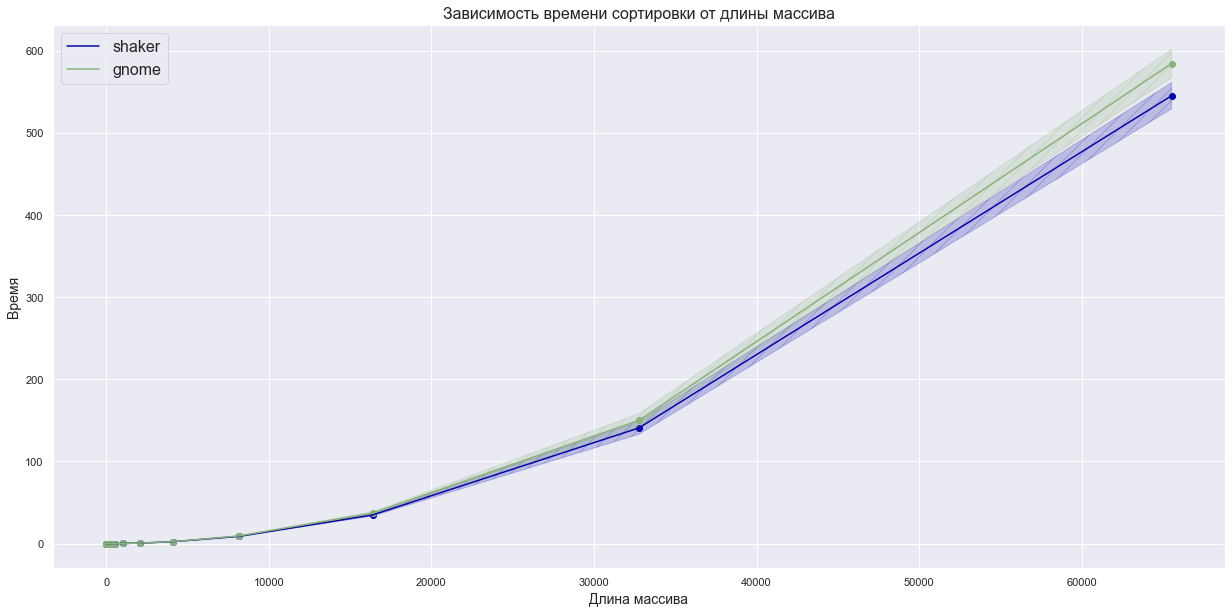

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(21, 10))
ax.plot(EXP1_ARR_LENGTHS[:15], mean_exp1[:, 0], label='shaker', color=sns.xkcd_rgb['royal blue'])
ax.scatter(EXP1_ARR_LENGTHS[:15], mean_exp1[:, 0], marker='o', color=sns.xkcd_rgb['royal blue'])
ax.fill_between(EXP1_ARR_LENGTHS[:15], mean_exp1[:, 0] + std_exp1[:, 0], mean_exp1[:, 0] - std_exp1[:, 0], hatch='//', color=sns.xkcd_rgb['royal blue'], alpha=0.2)

ax.plot(EXP1_ARR_LENGTHS[:15], mean_exp1[:, 1], label='gnome', color=sns.xkcd_rgb['sage green'])
ax.scatter(EXP1_ARR_LENGTHS[:15], mean_exp1[:, 1], marker='o', color=sns.xkcd_rgb['sage green'])
ax.fill_between(EXP1_ARR_LENGTHS[:15], mean_exp1[:, 1] + std_exp1[:, 1], mean_exp1[:, 1] - std_exp1[:, 1], hatch='//', color=sns.xkcd_rgb['sage green'], alpha=0.2)
ax.legend(fontsize=16)
ax.set_title('Зависимость времени сортировки от длины массива', fontsize=16)
ax.set_xlabel('Длина массива', fontsize=14)
ax.set_ylabel('Время', fontsize=14);

## 2. Зависимость от степени отсортированности

In [2]:
STAND_LENGTH = 2 ** 11
N_REPEATS = 4

In [3]:
exp2_metrics = []

with tqdm(total=STAND_LENGTH*N_REPEATS) as pbar:
    for _ in range(N_REPEATS):
        current_metrics = []
        stand = generate_stand(STAND_LENGTH)
        for array in stand:
            start_time = perf_counter()
            _ = shaker_sort(array)
            shaker_endtime = perf_counter()
            _ = gnome_sort(array)
            gnome_endtime = perf_counter()
        
            current_metrics.append([shaker_endtime - start_time, gnome_endtime - shaker_endtime])
            pbar.update()
        exp2_metrics.append(current_metrics)

exp2_metrics = np.array(exp2_metrics)

16388it [5:11:21,  1.14s/it]


In [5]:
mean_exp2 = np.mean(exp2_metrics, axis=0)
std_exp2 = np.std(exp2_metrics, axis=0)

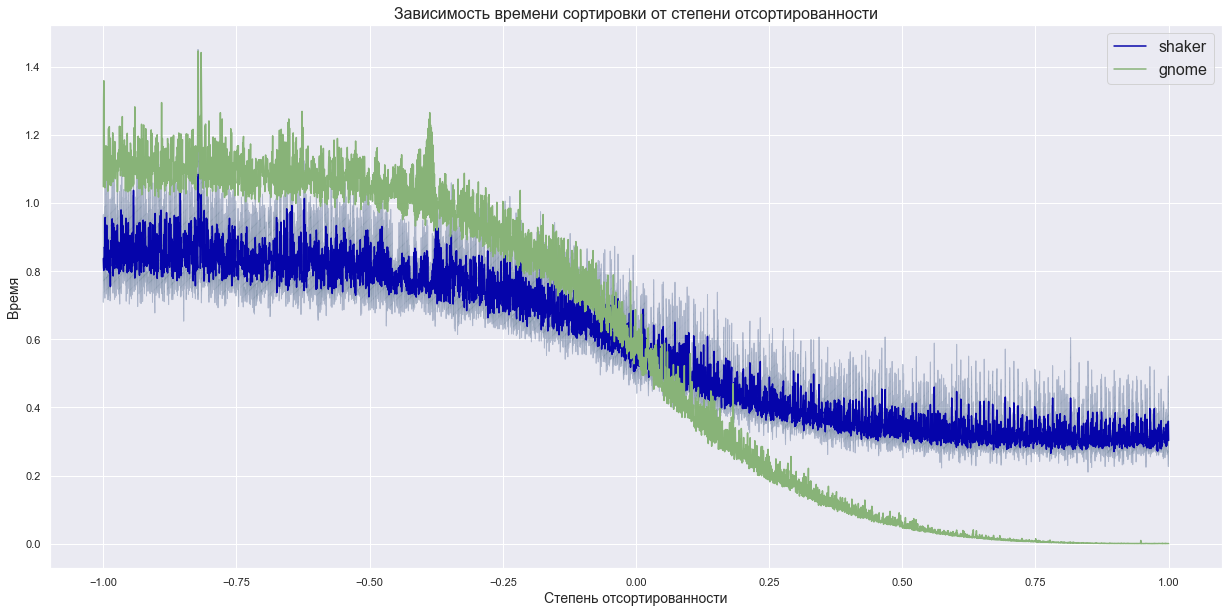

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(21, 10))
sort_ratio = [(x - STAND_LENGTH) / STAND_LENGTH for x in range(len(stand))]
ax.plot(sort_ratio, mean_exp2[:, 0], label='shaker', color=sns.xkcd_rgb['royal blue'])
ax.fill_between(sort_ratio, mean_exp2[:, 0] + std_exp2[:, 0], mean_exp2[:, 0] - std_exp2[:, 0], hatch='//', color=sns.xkcd_rgb['royal blue'], alpha=0.2)

ax.plot(sort_ratio, mean_exp2[:, 1], label='gnome', color=sns.xkcd_rgb['sage green'])
ax.fill_between(sort_ratio, mean_exp2[:, 0] + std_exp2[:, 0], mean_exp2[:, 0] - std_exp2[:, 0], hatch='//', color=sns.xkcd_rgb['sage green'], alpha=0.2)
ax.legend(fontsize=16)
ax.set_title('Зависимость времени сортировки от степени отсортированности', fontsize=16)
ax.set_xlabel('Степень отсортированности', fontsize=14)
ax.set_ylabel('Время', fontsize=14);